In [83]:
print(__doc__)

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy  
from scipy import linalg

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale  
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import itertools

from sklearn import mixture


style.use("ggplot")
%matplotlib inline

Automatically created module for IPython interactive environment


In [84]:
#dataset2
raw_data = pd.read_csv('C:/Users/Chenming/Desktop/assignment3/Data3_income census/adult.csv')
#age: numeric
#fnlwgt: numeric
#delete education because education number is repeating to this feature
#education_num: numeric
#capital_gain:numeric
#capital_loss:numeric
#hours_per_week:numeric
#native_country: has too many non-numeric values, delete
data=raw_data
data.drop
data['age']=raw_data.age
data['age']=data.age.astype(int)
data['fnlwgt']=raw_data.fnlwgt
data['fnlwgt']=data.fnlwgt.astype(int)
data['education_num']=raw_data.education_num
data['education_num']=data.education_num.astype(int)
data['capital_gain']=raw_data.capital_gain
data['capital_gain']=data.capital_gain.astype(int)
data['capital_loss']=raw_data.capital_loss
data['capital_loss']=data.capital_loss.astype(int)
data['hours_per_week']=raw_data.hours_per_week
data['hours_per_week']=data.hours_per_week.astype(int)

#convert workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
raw_data['workclass'] = raw_data.workclass.str.replace('Without-pay','0')
raw_data['workclass'] = raw_data.workclass.str.replace('Never-worked','1')
raw_data['workclass'] = raw_data.workclass.str.replace('Private','2')
raw_data['workclass'] = raw_data.workclass.str.replace('Self-emp-not-inc','3')
raw_data['workclass'] = raw_data.workclass.str.replace('Self-emp-inc','4')
raw_data['workclass'] = raw_data.workclass.str.replace('Federal-gov','5')
raw_data['workclass'] = raw_data.workclass.str.replace('Local-gov','6')
raw_data['workclass'] = raw_data.workclass.str.replace('State-gov','7')
raw_data['workclass'] = raw_data.workclass.str.replace('?','8')

data['workclass']=raw_data.workclass
data['workclass']=data.workclass.astype(int)

#convert marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse 
raw_data['marital_status'] = raw_data.marital_status.str.replace('Married-civ-spouse','0')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Divorced','1')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Never-married','2')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Separated','3')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Widowed','4')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Married-spouse-absent','5')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Married-AF-spouse','6')
data['marital_status']=raw_data.marital_status
data['marital_status']=data.marital_status.astype(int)

#convert occupation:Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, 
#Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, 
#Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, 
#Armed-Forces
raw_data['occupation'] = raw_data.occupation.str.replace('Tech-support','0')
raw_data['occupation'] = raw_data.occupation.str.replace('Craft-repair','1')
raw_data['occupation'] = raw_data.occupation.str.replace('Other-service','2')
raw_data['occupation'] = raw_data.occupation.str.replace('Sales','3')
raw_data['occupation'] = raw_data.occupation.str.replace('Exec-managerial','4')
raw_data['occupation'] = raw_data.occupation.str.replace('Prof-specialty','5')
raw_data['occupation'] = raw_data.occupation.str.replace('Handlers-cleaners','6')
raw_data['occupation'] = raw_data.occupation.str.replace('Machine-op-inspct','7')
raw_data['occupation'] = raw_data.occupation.str.replace('Adm-clerical','8')
raw_data['occupation'] = raw_data.occupation.str.replace('Farming-fishing','9')
raw_data['occupation'] = raw_data.occupation.str.replace('Transport-moving','10')
raw_data['occupation'] = raw_data.occupation.str.replace('Priv-house-serv','11')
raw_data['occupation'] = raw_data.occupation.str.replace('Protective-serv','12')
raw_data['occupation'] = raw_data.occupation.str.replace('Armed-Forces','13')
raw_data['occupation'] = raw_data.occupation.str.replace('?','14')

data['occupation']=raw_data.occupation
data['occupation']=data.occupation.astype(int)

#relationship:Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
raw_data['relationship'] = raw_data.relationship.str.replace('Wife','0')
raw_data['relationship'] = raw_data.relationship.str.replace('Own-child','1')
raw_data['relationship'] = raw_data.relationship.str.replace('Husband','2')
raw_data['relationship'] = raw_data.relationship.str.replace('Not-in-family','3')
raw_data['relationship'] = raw_data.relationship.str.replace('Other-relative','4')
raw_data['relationship'] = raw_data.relationship.str.replace('Unmarried','5')
data['relationship']=raw_data.relationship
data['relationship']=data.relationship.astype(int)

#race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
raw_data['race'] = raw_data.race.str.replace('White','0')
raw_data['race'] = raw_data.race.str.replace('Asian-Pac-Islander','1')
raw_data['race'] = raw_data.race.str.replace('Amer-Indian-Eskimo','2')
raw_data['race'] = raw_data.race.str.replace('Other','3')
raw_data['race'] = raw_data.race.str.replace('Black','4')
data['race']=raw_data.race
data['race']=data.race.astype(int)

#sex: Female, Male
raw_data['sex'] = raw_data.sex.str.replace('Female','0')
raw_data['sex'] = raw_data.sex.str.replace('Male','1')
data['sex']=raw_data.sex
data['sex']=data.sex.astype(int)

#set label_name column
data['income_name'] = raw_data.income

#income: >50K, <=50K
raw_data['income'] = raw_data.income.str.replace('>50K','1')
raw_data['income'] = raw_data.income.str.replace('<=50K','0')
raw_data['income'] = raw_data.income
raw_data['income'] = raw_data.income.astype(int)

datalist_label = data.income
datalist_names = data.income_name
datalist_label_names = np.array(['>50K','<=50K'])
datalist = data.drop(['fnlwgt','education','native_country','income','income_name'], axis=1)
datalist_array = datalist.values
datalist_array

array([[   39,     7,    13, ...,  2174,     0,    40],
       [   50,     3,    13, ...,     0,     0,    13],
       [   38,     2,     9, ...,     0,     0,    40],
       ..., 
       [   58,     2,     9, ...,     0,     0,    40],
       [   22,     2,     9, ...,     0,     0,    20],
       [   52,     4,     9, ..., 15024,     0,    40]])

In [85]:
datalist.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week
0,39,7,13,2,8,3,0,1,2174,0,40
1,50,3,13,0,4,2,0,1,0,0,13
2,38,2,9,1,6,3,0,1,0,0,40
3,53,2,7,0,6,2,4,1,0,0,40
4,28,2,13,0,5,0,4,0,0,0,40


In [86]:
EM_data = data.drop(['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country'], axis=1)
EM_data.head()

,income,income_name
0,0,<=50K
1,0,<=50K
2,0,<=50K
3,0,<=50K
4,0,<=50K


In [87]:
#NN  on X = datalist_array, y = datalist_label
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.cross_validation import StratifiedKFold
import time
from sklearn.neural_network import MLPClassifier

skf = StratifiedKFold(datalist_label, n_folds=4)
# Only take the first fold.
train_index, test_index = next(iter(skf))


X_train = datalist_array[train_index]
y_train = datalist_label[train_index].values
X_test  = datalist_array[test_index]
y_test  = datalist_label[test_index].values

In [88]:
#Implement ICA
from scipy import signal
from sklearn.decomposition import FastICA
# #############################################################################
# Generate sample data
Y=datalist_array

# Mix data
A = np.array([[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], 
              [0.5, 1, 1.5, 2, 2.5, 3, 1, 1.5, 2, 2.5, 3], 
              [3, 2, 1, 1, 2, 3, 1, 1, 2, 3, 1.5],
              [1, 2, 3, 3, 2, 1, 1, 2, 3, 3, 1], 
              [1, 3, 1.5, 2.5, 1, 2, 3, 1.5, 2.5, 1, 0.5], 
              [1.5, 1, 2, 2.5, 0.5, 1.5, 1.5, 1, 2, 2.5, 3],
              [2.5, 1, 1.5, 2, 0.5, 3, 1, 1.5, 2, 2.5, 1], 
              [3, 2, 0.5, 3, 2, 3, 1.5, 1, 2, 3, 2],
              [1.5, 2, 3, 1.5, 2, 1, 1, 1, 3, 3, 1.5], 
              [2, 3, 1.5, 2.5, 1, 2, 2, 3, 2.5, 0.5, 3],
              [0.5, 2, 1.5, 1, 2, 1.5, 2, 0.5, 1, 0.5, 2]
             ])  # Mixing matrix
Y_general = np.dot(Y,A.T)  # Generate observations

In [89]:
#original Kurtosis
scipy.stats.kurtosis(Y, fisher=False)

array([   2.83371379,    4.18529033,    3.62316408,    3.5265301 ,
          2.94919637,    3.13311385,    7.1910383 ,    1.5173341 ,
        157.77548393,   23.37348856,    5.91605467])

In [90]:
# Compute ICA
#  Higher values indicate a higher, sharper peak; lower values indicate a lower, less distinct peak
#if non-Fisher Kurtosis, nomral distribution is 3.  Closer to normal distribution is better for ML.
for i in range(1,6):
    ica = FastICA(n_components=i)
    S_ = ica.fit_transform(Y_general)  # Reconstruct signals
    print ('component: ', i, ', Kurtosis: ', scipy.stats.kurtosis(S_, fisher=False))

component:  1 , Kurtosis:  [ 157.35108969]
component:  2 , Kurtosis:  [ 52.04662955  39.51673849]
component:  3 , Kurtosis:  [  23.38402014  158.17892       4.50026843]
component:  4 , Kurtosis:  [   6.02989353    2.7563875   158.23741868   23.36825608]
component:  5 , Kurtosis:  [   4.52002542   23.37354884    3.7107185     5.79736152  158.23901801]


In [91]:
#try new S_ in K-means
ica = FastICA(n_components=2)
data_ICA = ica.fit_transform(Y_general)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix
data_ICA

array([[-0.00080614,  0.00119742],
       [ 0.00084326,  0.00118736],
       [ 0.00083416,  0.00119786],
       ..., 
       [ 0.00082385,  0.00104593],
       [ 0.00085024,  0.00133438],
       [-0.01044569,  0.00102787]])

In [92]:
#Try NN
#NN upon ICA dataset
from sklearn.metrics import explained_variance_score

X_train = data_ICA[train_index]
y_train = datalist_label[train_index].values
X_test  = data_ICA[test_index]
y_test  = datalist_label[test_index].values

start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(50,10), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.03)

mlp.fit(X_train, y_train)
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
elapsed_time = time.time() - start_time

print("Training set score: %f" % mlp.score(X_train, y_train))
print ("Training variance: ", explained_variance_score(y_train, y_train_pred, multioutput='uniform_average'))
print("Test set score: %f" % mlp.score(X_test, y_test))
print ("Testing variance: ", explained_variance_score(y_test, y_test_pred, multioutput='uniform_average'))
print ("Running Time: ", elapsed_time)

Iteration 1, loss = 0.55954674
Iteration 2, loss = 0.55242774
Iteration 3, loss = 0.55238843
Iteration 4, loss = 0.55255209
Iteration 5, loss = 0.55224921
Iteration 6, loss = 0.55239212
Iteration 7, loss = 0.55238830
Iteration 8, loss = 0.55228836
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 0.759214
Training variance:  0.0
Test set score: 0.759121
Testing variance:  0.0
Running Time:  0.5740327835083008


In [93]:
#EM, Try GMMs with K=2
new_component=2
cv_type='full'
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(data_ICA)
datalist_pred = gmm.predict(data_ICA)

EM_data['K2_ICA_label']=datalist_pred
K2_ICA_label = datalist_pred
K2_ICA_label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
tb1 = pd.crosstab(EM_data['income_name'],datalist_pred)
#data_label.head()
tb1

col_0,0,1
income_name,,
<=50K,23982,738
>50K,7068,773


In [95]:
#EM assign test K=2 label
def em_K1_label(alpha):
    label_max = max(tb1.iloc[i,alpha] for i in range(2))
    if tb1.iloc[0,alpha] == label_max:
        return '<=50K'
    if tb1.iloc[1,alpha] == label_max:
        return '>50K'
EM_data['K2_ICA_label_name']=EM_data['K2_ICA_label'].apply(em_K1_label)
EM_data.head()

,income,income_name,K2_ICA_label,K2_ICA_label_name
0,0,<=50K,0,<=50K
1,0,<=50K,0,<=50K
2,0,<=50K,0,<=50K
3,0,<=50K,0,<=50K
4,0,<=50K,0,<=50K


In [96]:
K2_ICA_accuracy = len(EM_data[EM_data['income_name']==EM_data['K2_ICA_label_name']])/len(EM_data)
print('K=2 ICA EM -> {0:.4f}%'.format(K2_ICA_accuracy*100))

K=2 ICA EM -> 76.0265%


In [97]:
# EM K=17, full
new_component=17
cv_type='full'
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(data_ICA)
datalist_pred = gmm.predict(data_ICA)

EM_data['K17_ICA_label']=datalist_pred
K17_ICA_label = datalist_pred

In [98]:
tb1 = pd.crosstab(EM_data['income_name'],datalist_pred)
#data_label.head()
tb1

col_0,0,1,2,3,4,5,6,7,9,10,11,12,13,15
income_name,,,,,,,,,,,,,,
<=50K,23754,310,0,0,217,86,297,0,8,17,2,1,21,7
>50K,5538,573,159,452,831,129,56,49,1,0,12,39,2,0


In [99]:
#EM: assign test K=17 label

EM_data['K17_ICA_label_name']=EM_data['K17_ICA_label'].apply(em_K1_label)
EM_data.head()

IndexError: single positional indexer is out-of-bounds

In [63]:
K17_ICA_accuracy = len(EM_data[EM_data['income_name']==EM_data['K17_ICA_label_name']])/len(EM_data)
print('K=17 ICA EM -> {0:.4f}%'.format(K17_ICA_accuracy*100))

KeyError: 'K17_ICA_label_name'

In [79]:
#K-means
data_ICA_df = pd.DataFrame(data=data_ICA[0:,0:],
                   columns=['ICA1','ICA2'])
data_ICA_df['income'] = datalist_label
data_ICA_df['income_name'] = datalist_names
data_ICA_df.head()

,ICA1,ICA2,income,income_name
0,0.001197,-0.000807,0,<=50K
1,0.001188,0.000842,0,<=50K
2,0.001199,0.000833,0,<=50K
3,0.001132,0.000827,0,<=50K
4,0.001303,0.000834,0,<=50K


In [80]:
#EM treated for NN
#choose K2 or K17_ICA_label 

data_ICA_EM_NN_df = pd.DataFrame(data=data_ICA[0:,0:],
                   columns=['ICA1','ICA2'])
data_ICA_EM_NN_df['ICA2_label'] = EM_data['K2_ICA_label']
data_ICA_EM_NN=data_ICA_EM_NN_df.values

In [81]:
#NN upon PCA EM K=2 dataset
X_train = data_ICA_EM_NN[train_index]
y_train = datalist_label[train_index]
X_test  = data_ICA_EM_NN[test_index]
y_test  = datalist_label[test_index]

start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(50,10), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.03)

mlp.fit(X_train, y_train)
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
elapsed_time = time.time() - start_time

print("Training set score: %f" % mlp.score(X_train, y_train))
print ("Training variance: ", explained_variance_score(y_train, y_train_pred, multioutput='uniform_average'))
print("Test set score: %f" % mlp.score(X_test, y_test))
print ("Testing variance: ", explained_variance_score(y_test, y_test_pred, multioutput='uniform_average'))
print ("Running Time: ", elapsed_time)

Iteration 1, loss = 0.55408583
Iteration 2, loss = 0.54580723
Iteration 3, loss = 0.54512607
Iteration 4, loss = 0.54456677
Iteration 5, loss = 0.54418518
Iteration 6, loss = 0.54396724
Iteration 7, loss = 0.54431001
Iteration 8, loss = 0.54405727
Iteration 9, loss = 0.54384472
Iteration 10, loss = 0.54390872
Iteration 11, loss = 0.54372076
Iteration 12, loss = 0.54370891
Iteration 13, loss = 0.54355105
Iteration 14, loss = 0.54373003
Iteration 15, loss = 0.54357929
Iteration 16, loss = 0.54340401
Iteration 17, loss = 0.54350484
Iteration 18, loss = 0.54359627
Iteration 19, loss = 0.54345871
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 0.760156
Training variance:  -0.103899006744
Test set score: 0.760595
Testing variance:  -0.10663768733
Running Time:  1.2460713386535645


In [82]:
data_ICA_df.describe()

,ICA1,ICA2,income
count,3.256100e+04,3.256100e+04,32561.000000
mean,7.911236e-19,-3.995708e-20,0.240810
std,5.541889e-03,5.541889e-03,0.427581
min,-5.899044e-02,-7.425443e-02,0.000000
25%,1.124668e-03,8.229837e-04,0.000000
50%,1.204790e-03,8.303157e-04,0.000000
75%,1.273569e-03,8.360737e-04,0.000000
max,1.455571e-03,8.643804e-04,1.000000


In [68]:
data_ICA_df.pivot_table(index='income_name', values=['ICA1','ICA2'],aggfunc=np.mean)

,ICA1,ICA2
income_name,,
<=50K,-0.000490,0.000708
>50K,0.001544,-0.002231


In [69]:
d_corr_ICA1=data_ICA_df.iloc[:,[0,1,2]].corr()
d_corr_ICA1


,ICA1,ICA2,income
ICA1,1.000000e+00,-1.367571e-14,0.156877
ICA2,-1.367571e-14,1.000000e+00,-0.226689
income,1.568766e-01,-2.266890e-01,1.000000


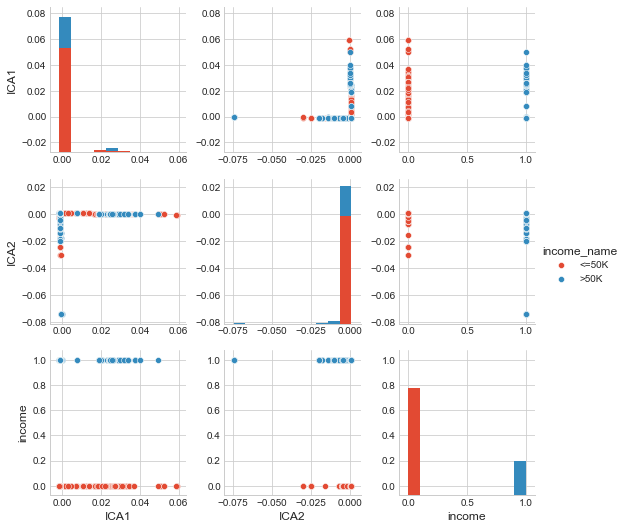

In [71]:
sns.set_style('whitegrid')
sns.pairplot(data_ICA_df.iloc[:,[0,1,2,3]], hue='income_name')
plt.show()

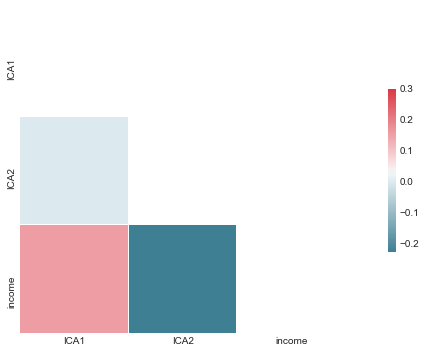

In [72]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
mask = np.zeros_like(d_corr_ICA1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(d_corr_ICA1,mask=mask, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

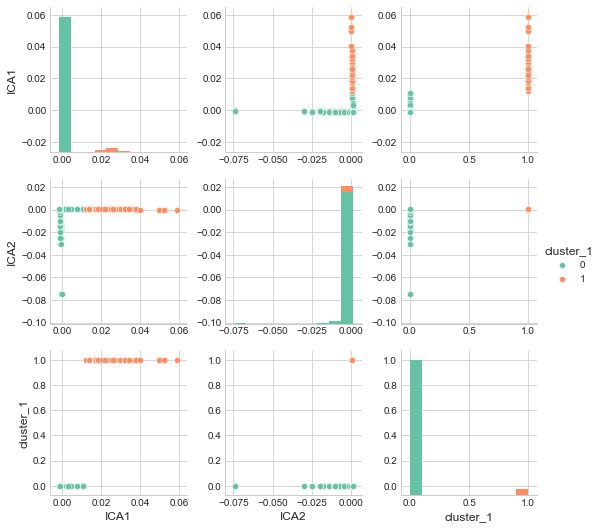

In [75]:
#K=2 K-means
kmeans_model_1 = KMeans(n_clusters=2,random_state=123)
distances_1 = kmeans_model_1.fit_transform(data_ICA_df.iloc[:,0:2])
labels_1 = kmeans_model_1.labels_
data_ICA_df['cluster_1']=labels_1
with sns.color_palette("Set2", 10):
    sns.pairplot(data_ICA_df.iloc[:,[0,1,4]], hue='cluster_1')

In [76]:
#statistics of acceptable_label cluster_1 vs species
tb1 = pd.crosstab(data_ICA_df['income_name'],labels_1)
tb1

col_0,0,1
income_name,,
<=50K,24006,714
>50K,7070,771


In [77]:
#cluster_1_label
def cluster_1_label(alpha):
    label_max = max(tb1.iloc[i,alpha] for i in range(2))
    if tb1.iloc[0,alpha] == label_max:
        return '<=50K'
    if tb1.iloc[1,alpha] == label_max:
        return '>50K'
data_ICA_df['cluster_1_label']=data_ICA_df['cluster_1'].apply(cluster_1_label)
data_ICA_df.head()

,ICA1,ICA2,income,income_name,cluster_1,cluster_1_label
0,-0.001197,-0.000807,0,<=50K,0,<=50K
1,-0.001188,0.000842,0,<=50K,0,<=50K
2,-0.001199,0.000833,0,<=50K,0,<=50K
3,-0.001132,0.000827,0,<=50K,0,<=50K
4,-0.001303,0.000834,0,<=50K,0,<=50K


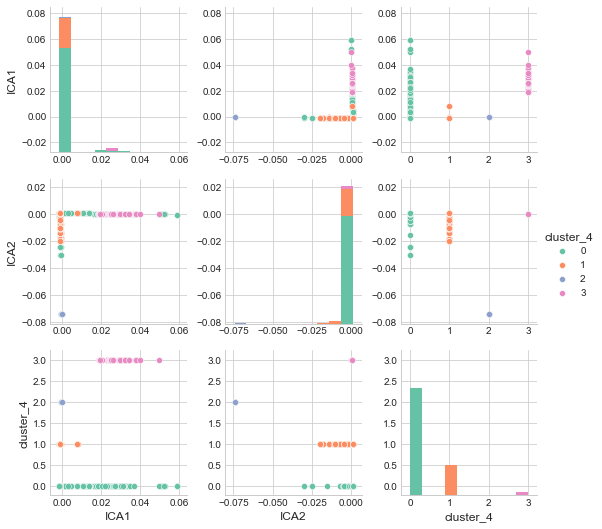

In [78]:
#K=4
kmeans_model_4 = KMeans(n_clusters=4,random_state=123)
distances_4 = kmeans_model_4.fit_transform(data_ICA_df.iloc[:,0:3])
labels_4 = kmeans_model_4.labels_
data_ICA_df['cluster_4']=labels_4
with sns.color_palette("Set2", 10):
    sns.pairplot(data_ICA_df.iloc[:,[0,1,6]], hue='cluster_4')

In [81]:
data_ICA_df.head()

,ICA1,ICA2,income,income_name,cluster_1,cluster_1_label,cluster_4
0,-0.001197,-0.000807,0,<=50K,0,<=50K,0
1,-0.001188,0.000842,0,<=50K,0,<=50K,0
2,-0.001199,0.000833,0,<=50K,0,<=50K,0
3,-0.001132,0.000827,0,<=50K,0,<=50K,0
4,-0.001303,0.000834,0,<=50K,0,<=50K,0


In [82]:
#compare labels K=4
tb1 = pd.crosstab(data_ICA_df['income_name'],labels_4)
tb1

col_0,0,1,2,3
income_name,,,,
<=50K,24720,0,0,0
>50K,0,6911,159,771


In [83]:
#cluster_4_label
data_ICA_df['cluster_4_label']=data_ICA_df['cluster_4'].apply(cluster_1_label)
data_ICA_df.head()

,ICA1,ICA2,income,income_name,cluster_1,cluster_1_label,cluster_4,cluster_4_label
0,-0.001197,-0.000807,0,<=50K,0,<=50K,0,<=50K
1,-0.001188,0.000842,0,<=50K,0,<=50K,0,<=50K
2,-0.001199,0.000833,0,<=50K,0,<=50K,0,<=50K
3,-0.001132,0.000827,0,<=50K,0,<=50K,0,<=50K
4,-0.001303,0.000834,0,<=50K,0,<=50K,0,<=50K


In [84]:
#find center of K-means=4
centroids_ICA1 = kmeans_model_1.cluster_centers_
print (centroids_ICA1)

[[ -1.19157055e-03  -1.61553997e-05]
 [  2.49355194e-02   3.38077577e-04]]


In [85]:
#find center of K-means=4
centroids_ICA4 = kmeans_model_4.cluster_centers_

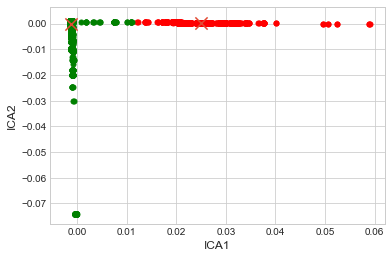

In [86]:
#ICA K=4, upon cluster_1
colors = ["g.", "r.", "b.", "y."]
for i in range(len(data_ICA_df)):
    plt.plot(data_ICA_df.iloc[i,0],data_ICA_df.iloc[i,1], colors[data_ICA_df.iloc[i,4]], markersize = 10)    
plt.scatter(centroids_ICA1[:,0], centroids_ICA1[:,1],marker="x", s=150, linewidths =5, zorder=10)
plt.xlabel('ICA1')
plt.ylabel('ICA2')
plt.show()


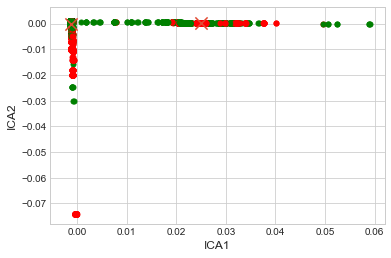

In [87]:
#ICA K=4 upon original label
colors = ["g.", "r.", "b.", "y."]
for i in range(len(data_ICA_df)):
    plt.plot(data_ICA_df.iloc[i,0],data_ICA_df.iloc[i,1], colors[data_ICA_df.iloc[i,2]], markersize = 10)    
plt.scatter(centroids_ICA1[:,0], centroids_ICA1[:,1],marker="x", s=150, linewidths =5, zorder=10)
plt.xlabel('ICA1')
plt.ylabel('ICA2')
plt.show()


In [88]:
data_ICA_df.head()

,ICA1,ICA2,income,income_name,cluster_1,cluster_1_label,cluster_4,cluster_4_label
0,-0.001197,-0.000807,0,<=50K,0,<=50K,0,<=50K
1,-0.001188,0.000842,0,<=50K,0,<=50K,0,<=50K
2,-0.001199,0.000833,0,<=50K,0,<=50K,0,<=50K
3,-0.001132,0.000827,0,<=50K,0,<=50K,0,<=50K
4,-0.001303,0.000834,0,<=50K,0,<=50K,0,<=50K


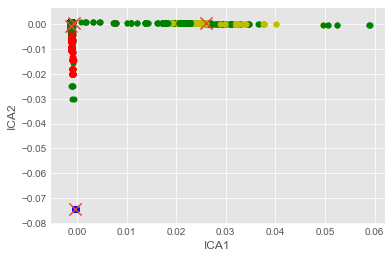

In [89]:
#ICA K=4 upon cluster_4
style.use("ggplot")
colors = ["g.", "r.", "b.", "y."]
for i in range(len(data_ICA_df)):
    plt.plot(data_ICA_df.iloc[i,0],data_ICA_df.iloc[i,1], colors[data_ICA_df.iloc[i,6]], markersize = 10)    
plt.scatter(centroids_ICA4[:,0], centroids_ICA4[:,1],marker="x", s=150, linewidths =5, zorder=10)
plt.xlabel('ICA1')
plt.ylabel('ICA2')
plt.show()

In [90]:
d_corr_ICA1=data_ICA_df.iloc[:,[0,1,4]].corr()
d_corr_ICA1
#Correlation K=4 for dataset after ICA

,ICA1,ICA2,cluster_1
ICA1,1.000000e+00,-1.367571e-14,0.983599
ICA2,-1.367571e-14,1.000000e+00,0.013336
cluster_1,9.835987e-01,1.333570e-02,1.000000


In [91]:
d_corr_ICA4=data_ICA_df.iloc[:,[0,1,6]].corr()
d_corr_ICA4

,ICA1,ICA2,cluster_4
ICA1,1.000000e+00,-1.367571e-14,0.483177
ICA2,-1.367571e-14,1.000000e+00,-0.266448
cluster_4,4.831772e-01,-2.664478e-01,1.000000


In [94]:
cluster_1_accuracy = len(data_ICA_df[data_ICA_df['income_name']==data_ICA_df['cluster_1_label']])/len(data_ICA_df)
cluster_4_accuracy = len(data_ICA_df[data_ICA_df['income_name']==data_ICA_df['cluster_4_label']])/len(data_ICA_df)
print('K=2 KMeans -> {0:.4f}%'.format(cluster_1_accuracy*100))
print('K=4 KMeans -> {0:.4f}%'.format(cluster_4_accuracy*100))

K=2 KMeans -> 76.0941%
K=4 KMeans -> 100.0000%


In [95]:
data_ICA_df.describe()

,ICA1,ICA2,income,cluster_1,cluster_4
count,3.256100e+04,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,-1.034116e-18,-1.246661e-20,0.240810,0.045607,0.293050
std,5.541889e-03,5.541889e-03,0.427581,0.208634,0.599183
min,-1.455555e-03,-7.425442e-02,0.000000,0.000000,0.000000
25%,-1.273553e-03,8.230050e-04,0.000000,0.000000,0.000000
50%,-1.204775e-03,8.303373e-04,0.000000,0.000000,0.000000
75%,-1.124653e-03,8.360986e-04,0.000000,0.000000,0.000000
max,5.899044e-02,8.644066e-04,1.000000,1.000000,3.000000
